# Modules and Classes

Path setup for libs:

In [1]:
import sys,os
sys.path.append(os.path.expanduser('./libitmal'))

from libitmal import utils as itmalutils
print(dir(itmalutils))
print(itmalutils.__file__)

['AssertInRange', 'CheckFloat', 'InRange', 'Iterable', 'PrintMatrix', 'ResetRandom', 'TEST', 'TestAll', 'TestCheckFloat', 'TestPrintMatrix', 'TestVarName', 'VarName', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ctxlib', 'inf', 'inspect', 'isFloat', 'isList', 'isNumpyArray', 'nan', 'np', 'random', 're']
c:\Users\benja\Documents\UniRepos\6-semester\mal_grp30\O1\libitmal\utils.py


### Qa - Load and test libitmal

In [2]:
from libitmal import utils as itmalutils

itmalutils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


### Qb Create your own module, with some functions, and test it

In [3]:
import malutils

malutils.HelloWorld()
malutils.Greeter("Pokemon!")

Hello World!
Hello Pokemon!!


### Qc How do you 'recompile' a module?

#### Answer
Reload of modules can be done in serveral ways. One simple way is to just restart the kernal.
Another is the code below.

In [4]:
import importlib
importlib.reload(malutils)


<module 'malutils' from 'c:\\Users\\benja\\Documents\\UniRepos\\6-semester\\mal_grp30\\O1\\malutils\\__init__.py'>

# Intro

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

datapath = os.path.join("./datasets", "lifesat", "")

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
#country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
#plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)

print("OK")


OK


### Qa) The $\theta$ parameters and the $R^2$ Score


### Answers

Maximum for $R^2$ is 1.

Minimum for $R^2$ is negative infinity. This is if the model makes predictions worse than just guessing the average, and can be a result of overfitting, bad test data etc.

It's better to have a higher R^2 score. This measures the fitness of the model.

In [6]:
# skæring ved x-aksen
theta_0 = model.intercept_
# koefficienten
theta_1 = model.coef_[0]
print(f"h(x) = {theta_0[0]:.4f} + {theta_1[0]}x")

u = np.sum((y - model.predict(X))**2)
v = np.sum((y - np.mean(y))**2)

R2 = 1 - u/v
R2_skl = model.score(X, y)
print(f"R2 = {R2}")
print(f"R2_skl = {R2_skl}")

h(x) = 4.8531 + 4.911544589158484e-05x
R2 = 0.7344414355437031
R2_skl = 0.7344414355437031


### Qb) Using k-Nearest Neighbors


### Answers

KNN regressor also uses R^2 as a score, so in that regard they can be compared to each other. However, the knn model might overfit to the data, since k=3 allows for the model to fluctuate a bit.

X.shape= (29, 1)
y.shape= (29, 1)


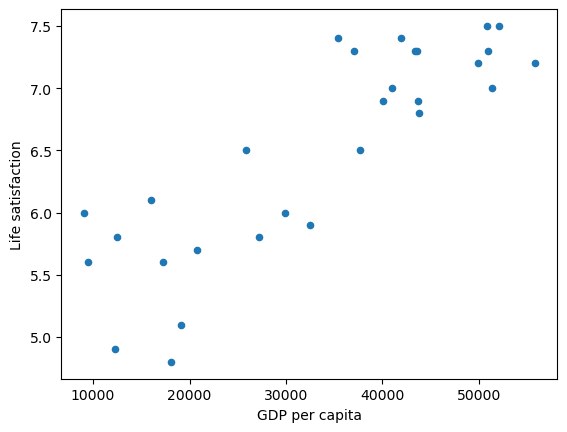

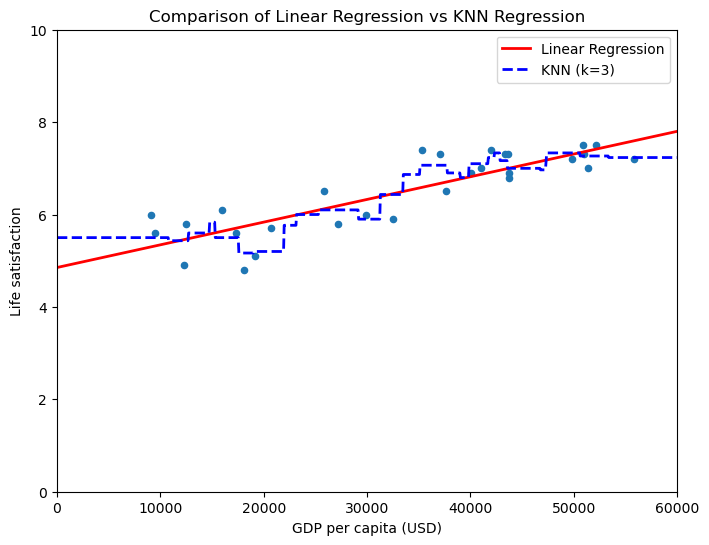

Linear Regression Score (R²): 0.734
KNN Score (R²): 0.853

Predictions for Cyprus (GDP = 22587 USD):
Linear Regression: 5.96
KNN (k=3): [5.76666667]
KNN score              : 0.8525732853499179
Linear Regression score: 0.7344414355437031


In [7]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
k = 3
knn = sklearn.neighbors.KNeighborsRegressor(k)
knn.fit(X, y)

# Plot knn
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

y_pred_lin = model.predict(M)  # Linear regression predictions
y_pred_knn = knn.predict(M)

# Create the plot
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8, 6))
plt.axis([0, 60000, 0, 10])

# Plot both model predictions
plt.plot(m, y_pred_lin, "r-", label="Linear Regression", linewidth=2)
plt.plot(m, y_pred_knn, "b--", label=f"KNN (k={k})", linewidth=2)

# Add labels and legend
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.legend()
plt.title("Comparison of Linear Regression vs KNN Regression")
plt.show()

# Print model performance
print(f"Linear Regression Score (R²): {model.score(X, y):.3f}")
print(f"KNN Score (R²): {knn.score(X, y):.3f}")

# Make prediction for Cyprus
X_cyprus = [[22587]]
lin_pred = model.predict(X_cyprus)
knn_pred = knn.predict(X_cyprus)

print(f"\nPredictions for Cyprus (GDP = 22587 USD):")
print(f"Linear Regression: {lin_pred[0][0]:.2f}")
print(f"KNN (k={k}): {knn_pred[0]}")

knn_score = knn.score(X, y)
print(f"KNN score              : {knn_score}")
print(f"Linear Regression score: {R2_skl}")


### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check


### Answers

While a k = 1 produces a score $R^2$ of 1, this is highly overfitted, and would probably not produce accurate predictions on new data.

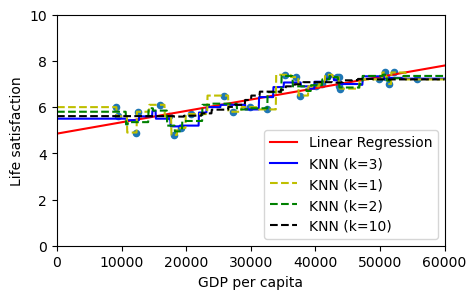

KNN score (k=1)   : 1.0
KNN score (k=2)   : 0.9091881835016248
KNN score (k=3)   : 0.8525732853499179
KNN score (k=10)  : 0.7833080605150065
Linear Regression score: 0.7344414355437031


In [8]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000]
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
knn_score3 = knn.score(X, y)

knn = sklearn.neighbors.KNeighborsRegressor(1)
knn.fit(X, y)
knn_score1 = knn.score(X, y)
y_pred_knn1 = knn.predict(M)
plt.plot(m, y_pred_knn1, "y--", label="KNN (k=1)")

knn = sklearn.neighbors.KNeighborsRegressor(2)
knn.fit(X, y)
knn_score2 = knn.score(X, y)
y_pred_knn2 = knn.predict(M)
plt.plot(m, y_pred_knn2, "g--", label="KNN (k=2)")

knn = sklearn.neighbors.KNeighborsRegressor(10)
knn.fit(X, y)
knn_score10 = knn.score(X, y)
y_pred_knn10 = knn.predict(M)
plt.plot(m, y_pred_knn10, "k--", label="KNN (k=10)")

plt.legend()
plt.show()

#scores
print(f"KNN score (k=1)   : {knn_score1}")
print(f"KNN score (k=2)   : {knn_score2}")
print(f"KNN score (k=3)   : {knn_score3}")
print(f"KNN score (k=10)  : {knn_score10}")
print(f"Linear Regression score: {R2_skl}")

### Qd) Trying out a Neural Network


Iteration 1, loss = 4777823.29229368
Iteration 2, loss = 4585195.61360654
Iteration 3, loss = 4396419.95846511
Iteration 4, loss = 4211574.37947518
Iteration 5, loss = 4030732.83262834
Iteration 6, loss = 3853964.87116154
Iteration 7, loss = 3681335.34756957
Iteration 8, loss = 3512904.12652214
Iteration 9, loss = 3348725.81128534
Iteration 10, loss = 3188849.48606815
Iteration 11, loss = 3033318.47651519
Iteration 12, loss = 2882170.13035235
Iteration 13, loss = 2735435.61996652
Iteration 14, loss = 2593139.76847002
Iteration 15, loss = 2455300.90056746
Iteration 16, loss = 2321930.71931201
Iteration 17, loss = 2193034.20961312
Iteration 18, loss = 2068609.56914032
Iteration 19, loss = 1948648.16706146
Iteration 20, loss = 1833134.53085959
Iteration 21, loss = 1722046.36129192
Iteration 22, loss = 1615354.57538797
Iteration 23, loss = 1513023.37723150
Iteration 24, loss = 1415010.35613253
Iteration 25, loss = 1321266.61167000
Iteration 26, loss = 1231736.90497151
Iteration 27, loss = 

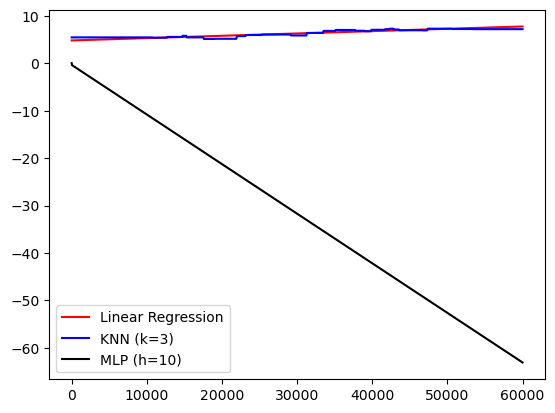

Predictions for Cyprus (GDP = 22587 USD): -23.938814316222565
KNN score (k=3)   : 0.8525732853499179
Linear Regression score: 0.7344414355437031
MLP score         : -2924.167214370441


In [9]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M)

mlp_score = mlp.score(X, y)

plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
plt.plot(m, y_pred_mlp, "k", label="MLP (h=10)")

plt.legend()
plt.show()

y_nn_pred = mlp.predict(X_cyprus)
print(f"Predictions for Cyprus (GDP = 22587 USD): {y_nn_pred[0]}")

# Scores
print(f"KNN score (k=3)   : {knn_score3}")
print(f"Linear Regression score: {R2_skl}")
print(f"MLP score         : {mlp_score}")
